In [ ]:
!nvidia-smi

Thu Apr 13 08:16:04 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tqdm.notebook import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Training

In [ ]:
directory = '/content/drive/MyDrive/Data/fin_par/100_all_jpeg_bw'

another = []
train_images = []

for j in tqdm(range(1,100)):
  train_images_series = [i for i in os.listdir(directory) if i.startswith(f'{j}_')]
  another.append(train_images_series)

  0%|          | 0/99 [00:00<?, ?it/s]

In [ ]:
another

[['1_t2m.jpeg',
  '1_d2m.jpeg',
  '1_e.jpeg',
  '1_sp.jpeg',
  '1_swvl.jpeg',
  '1_w10.jpeg'],
 ['2_t2m.jpeg',
  '2_d2m.jpeg',
  '2_e.jpeg',
  '2_sp.jpeg',
  '2_swvl.jpeg',
  '2_w10.jpeg'],
 ['3_t2m.jpeg',
  '3_d2m.jpeg',
  '3_e.jpeg',
  '3_sp.jpeg',
  '3_swvl.jpeg',
  '3_w10.jpeg'],
 ['4_t2m.jpeg',
  '4_d2m.jpeg',
  '4_e.jpeg',
  '4_sp.jpeg',
  '4_swvl.jpeg',
  '4_w10.jpeg'],
 ['5_t2m.jpeg',
  '5_d2m.jpeg',
  '5_e.jpeg',
  '5_sp.jpeg',
  '5_swvl.jpeg',
  '5_w10.jpeg'],
 ['6_t2m.jpeg',
  '6_d2m.jpeg',
  '6_e.jpeg',
  '6_sp.jpeg',
  '6_swvl.jpeg',
  '6_w10.jpeg'],
 ['7_t2m.jpeg',
  '7_d2m.jpeg',
  '7_e.jpeg',
  '7_sp.jpeg',
  '7_swvl.jpeg',
  '7_w10.jpeg'],
 ['8_t2m.jpeg',
  '8_d2m.jpeg',
  '8_e.jpeg',
  '8_sp.jpeg',
  '8_swvl.jpeg',
  '8_w10.jpeg'],
 ['9_t2m.jpeg',
  '9_d2m.jpeg',
  '9_e.jpeg',
  '9_sp.jpeg',
  '9_swvl.jpeg',
  '9_w10.jpeg'],
 ['10_t2m.jpeg',
  '10_d2m.jpeg',
  '10_e.jpeg',
  '10_sp.jpeg',
  '10_swvl.jpeg',
  '10_w10.jpeg'],
 ['11_t2m.jpeg',
  '11_d2m.jpeg',
  '11_e.jp

In [ ]:
for i in tqdm(another):
  for k in i:
    image = cv2.imread(directory + '/' + k)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image,(360,368))
    #print(image.shape)
    train_images.append(image)
print(len(train_images))

  0%|          | 0/99 [00:00<?, ?it/s]

594


In [ ]:
train_images_series = [train_images[n:n+6] for n in range(0, len(train_images), 6)]

In [ ]:
train_images_series_n = np.array(train_images_series)

In [ ]:
train_images_series_n = train_images_series_n/255

In [ ]:
train_images_series_n.shape

(99, 6, 368, 360)

In [ ]:
train_images_series_n = train_images_series_n.reshape(99, 6, 368, 360, 1)
train_images_series_n.shape

(99, 6, 368, 360, 1)

Displaying frames for example 73.


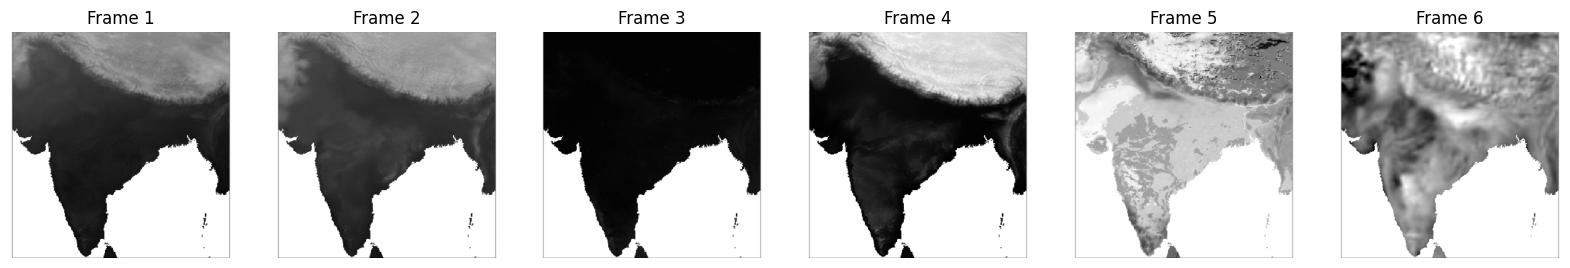

In [ ]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(1,6 , figsize=(20, 8))

# Plot each of the sequential images for one random data example.
data_choice = np.random.choice(range(len(train_images_series_n)), size=1)[0]
for idx, ax in enumerate(axes.flat):
  #print(data_choice,idx)
  ax.imshow(np.squeeze(train_images_series_n[data_choice][idx]), cmap="gray")
  ax.set_title(f"Frame {idx + 1}")
  ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames for example {data_choice}.")
plt.show()

# Testing

In [ ]:
directory = '/content/drive/MyDrive/Data/fin_par/100_all_jpeg_bw'

another_test = []
test_images = []

for j in tqdm(range(2,101)):
  test_images_series = [i for i in os.listdir(directory) if i.startswith(f'{j}_')]
  another_test.append(test_images_series)

  0%|          | 0/99 [00:00<?, ?it/s]

In [ ]:
for i in tqdm(another_test):
  for k in i:
    image = cv2.imread(directory + '/' + k)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image,(360,368))
    test_images.append(image)
print(len(test_images))

  0%|          | 0/99 [00:00<?, ?it/s]

594


In [ ]:
another_test

[['2_t2m.jpeg',
  '2_d2m.jpeg',
  '2_e.jpeg',
  '2_sp.jpeg',
  '2_swvl.jpeg',
  '2_w10.jpeg'],
 ['3_t2m.jpeg',
  '3_d2m.jpeg',
  '3_e.jpeg',
  '3_sp.jpeg',
  '3_swvl.jpeg',
  '3_w10.jpeg'],
 ['4_t2m.jpeg',
  '4_d2m.jpeg',
  '4_e.jpeg',
  '4_sp.jpeg',
  '4_swvl.jpeg',
  '4_w10.jpeg'],
 ['5_t2m.jpeg',
  '5_d2m.jpeg',
  '5_e.jpeg',
  '5_sp.jpeg',
  '5_swvl.jpeg',
  '5_w10.jpeg'],
 ['6_t2m.jpeg',
  '6_d2m.jpeg',
  '6_e.jpeg',
  '6_sp.jpeg',
  '6_swvl.jpeg',
  '6_w10.jpeg'],
 ['7_t2m.jpeg',
  '7_d2m.jpeg',
  '7_e.jpeg',
  '7_sp.jpeg',
  '7_swvl.jpeg',
  '7_w10.jpeg'],
 ['8_t2m.jpeg',
  '8_d2m.jpeg',
  '8_e.jpeg',
  '8_sp.jpeg',
  '8_swvl.jpeg',
  '8_w10.jpeg'],
 ['9_t2m.jpeg',
  '9_d2m.jpeg',
  '9_e.jpeg',
  '9_sp.jpeg',
  '9_swvl.jpeg',
  '9_w10.jpeg'],
 ['10_t2m.jpeg',
  '10_d2m.jpeg',
  '10_e.jpeg',
  '10_sp.jpeg',
  '10_swvl.jpeg',
  '10_w10.jpeg'],
 ['11_t2m.jpeg',
  '11_d2m.jpeg',
  '11_e.jpeg',
  '11_sp.jpeg',
  '11_swvl.jpeg',
  '11_w10.jpeg'],
 ['12_t2m.jpeg',
  '12_d2m.jpeg',
  '1

In [ ]:
test_images_series = [test_images[n:n+6] for n in range(0, len(test_images), 6)]

In [ ]:
test_images_series_n = np.array(test_images_series)

In [ ]:
test_images_series_n = test_images_series_n/255

In [ ]:
test_images_series_n = test_images_series_n.reshape(99, 6, 368, 360, 1)
test_images_series_n.shape

(99, 6, 368, 360, 1)

Displaying frames for example 33.


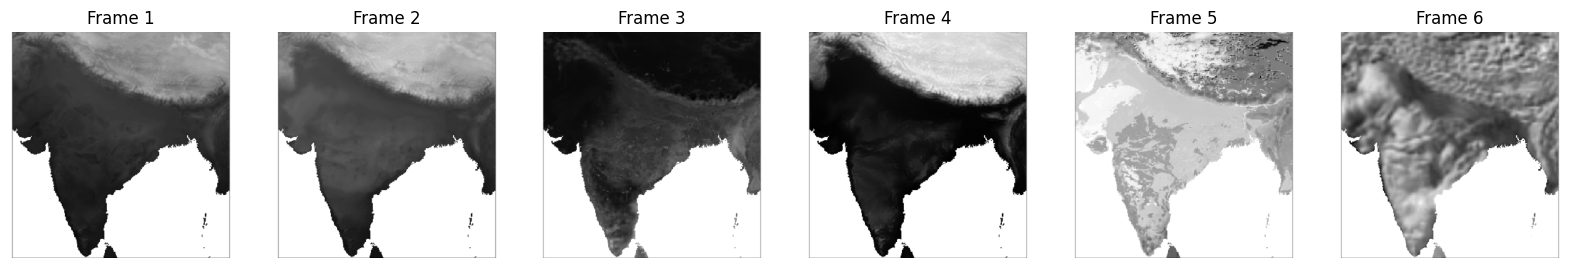

In [ ]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(1,6 , figsize=(20, 6))

# Plot each of the sequential images for one random data example.
data_choice = np.random.choice(range(len(test_images_series_n)), size=1)[0]
for idx, ax in enumerate(axes.flat):
  #print(data_choice,idx)
  ax.imshow(np.squeeze(test_images_series_n[data_choice][idx]), cmap="gray")
  ax.set_title(f"Frame {idx + 1}")
  ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames for example {data_choice}.")
plt.show()

#Model2

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from keras.utils import plot_model
import pylab as plt

In [ ]:
#train_images_series_n.shape = (64, 8, 440, 328, 3)

in_shape = train_images_series_n.shape[1:]
model = keras.Sequential()
model.add(keras.layers.ConvLSTM2D(32, kernel_size=(3, 3), padding='same', return_sequences=True, input_shape=in_shape))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling3D(pool_size=(1, 2, 2)))
model.add(keras.layers.ConvLSTM2D(64, kernel_size=(5, 5), padding='valid', return_sequences=True))
model.add(keras.layers.MaxPooling3D(pool_size=(1, 2, 2)))
model.add(keras.layers.ConvLSTM2D(96, kernel_size=(3, 3), padding='valid', return_sequences=True))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.ConvLSTM2D(96, kernel_size=(3, 3), padding='valid', return_sequences=True))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.ConvLSTM2D(96, kernel_size=(3, 3), padding='valid', return_sequences=True))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.ConvLSTM2D(96, kernel_size=(3, 3), padding='valid', return_sequences=True))
model.add(keras.layers.MaxPooling3D(pool_size=(1, 2, 2)))
model.add(keras.layers.Dense(320))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))

out_shape = model.output_shape
#print('====Model shape: ', out_shape)
model.add(keras.layers.Reshape((out_shape[1], out_shape[2] * out_shape[3] * out_shape[4])))
model.add(keras.layers.LSTM(64, return_sequences=True))
model.add(keras.layers.LSTM(128, return_sequences=False))


model.add(keras.layers.Dense(in_shape[0]*in_shape[1]*in_shape[2]*in_shape[3]))
model.add(keras.layers.Reshape(in_shape))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mse'])

    # model structure summary
plot_model(model, show_shapes=True)

In [ ]:
epochs = 200

history = model.fit(train_images_series_n, test_images_series_n,batch_size=2,epochs=epochs)

Epoch 1/200
50/50 [==============================] - 125s 2s/step - loss: 3.4414 - mse: 0.2684
Epoch 2/200
50/50 [==============================] - 81s 2s/step - loss: 2.3677 - mse: 0.1425
Epoch 3/200
50/50 [==============================] - 78s 2s/step - loss: 2.0649 - mse: 0.1184
Epoch 4/200
50/50 [==============================] - 79s 2s/step - loss: 1.8049 - mse: 0.1026
Epoch 5/200
50/50 [==============================] - 86s 2s/step - loss: 1.5658 - mse: 0.0895
Epoch 6/200
50/50 [==============================] - 85s 2s/step - loss: 1.3677 - mse: 0.0786
Epoch 7/200
50/50 [==============================] - 84s 2s/step - loss: 1.2151 - mse: 0.0707
Epoch 8/200
50/50 [==============================] - 84s 2s/step - loss: 1.1099 - mse: 0.0634
Epoch 9/200
50/50 [==============================] - 81s 2s/step - loss: 1.0174 - mse: 0.0554
Epoch 10/200
50/50 [==============================] - 85s 2s/step - loss: 0.9628 - mse: 0.0487
Epoch 11/200
50/50 [==============================] - 88s 

In [ ]:
history.history.keys()

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Data/fin_par/bw_model.h5')

#Test

In [ ]:
from keras.models import load_model

model = load_model('/content/drive/MyDrive/Data/fin_par/bw_model.h5')

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d_18 (ConvLSTM2D)  (None, 6, 368, 360, 32)  38144     
                                                                 
 activation_15 (Activation)  (None, 6, 368, 360, 32)   0         
                                                                 
 max_pooling3d_9 (MaxPooling  (None, 6, 184, 180, 32)  0         
 3D)                                                             
                                                                 
 conv_lstm2d_19 (ConvLSTM2D)  (None, 6, 180, 176, 64)  614656    
                                                                 
 max_pooling3d_10 (MaxPoolin  (None, 6, 90, 88, 64)    0         
 g3D)                                                            
                                                                 
 conv_lstm2d_20 (ConvLSTM2D)  (None, 6, 88, 86, 96)   

In [ ]:
test = train_images_series_n[0]
test = test.reshape(1,6, 368, 360, 1)

In [ ]:
pred = model.predict(test)

1/1 [==============================] - 11s 11s/step


In [ ]:
pred = pred.reshape(6, 368, 360, 1)

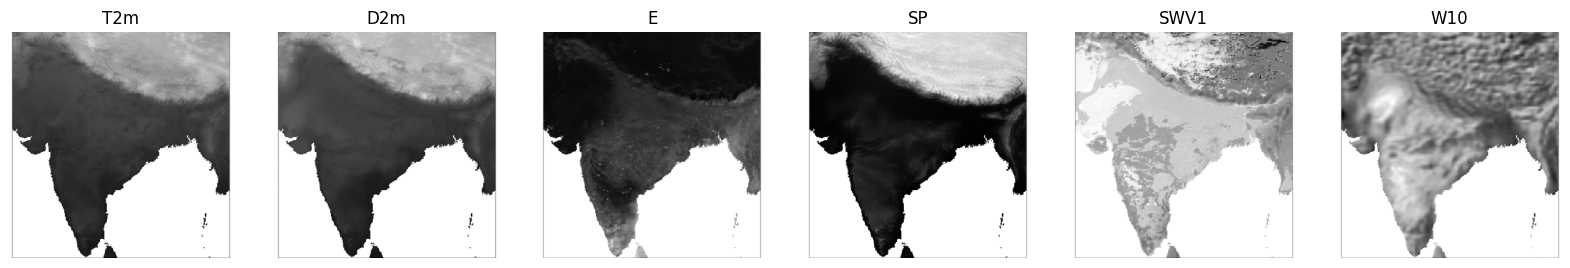

In [ ]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(1,6 , figsize=(20, 8))

label = ['T2m','D2m','E','SP','SWVL1','W10']
# Plot each of the sequential images for one random data example.
#data_choice = np.random.choice(range(len(pred)), size=1)[0]
for idx, ax in enumerate(axes.flat):
  #print(data_choice,idx)
  ax.imshow(np.squeeze(train_images_series_n[0][idx]), cmap="gray")
  ax.set_title(label[idx])
  ax.axis("off")

# Print information and display the figure.
plt.show()

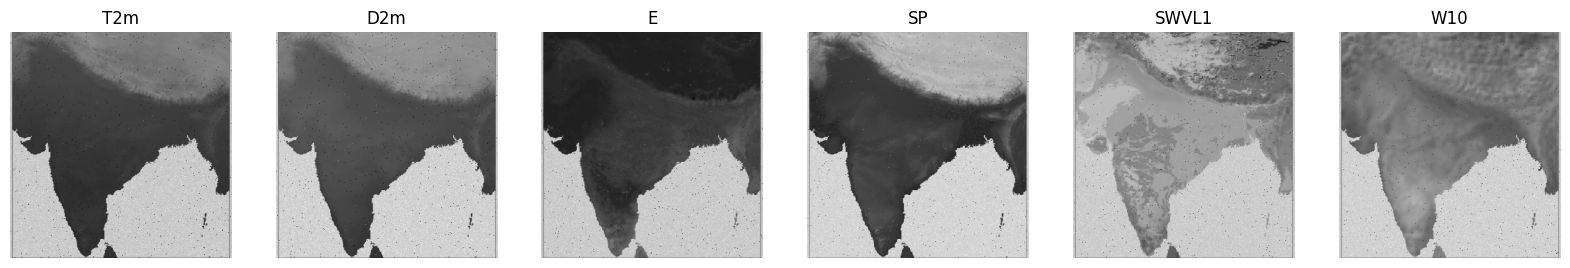

In [ ]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(1,6 , figsize=(20, 8))
label = ['T2m','D2m','E','SP','SWVL1','W10']

# Plot each of the sequential images for one random data example.
#data_choice = np.random.choice(range(len(pred)), size=1)[0]
for idx, ax in enumerate(axes.flat):
  #print(data_choice,idx)
  ax.imshow(np.squeeze(pred[idx]), cmap="gray")
  ax.set_title(label[idx])
  ax.axis("off")

# Print information and display the figure.
plt.show()

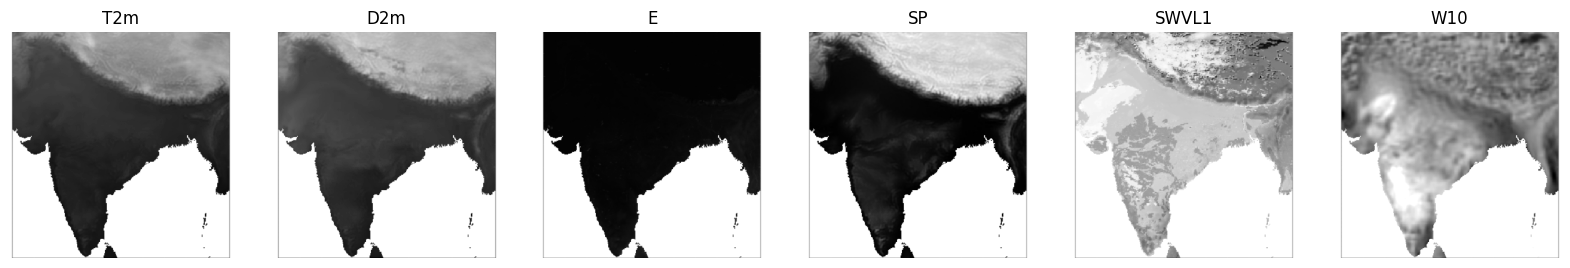

In [ ]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(1,6 , figsize=(20, 8))
label = ['T2m','D2m','E','SP','SWVL1','W10']

# Plot each of the sequential images for one random data example.
#data_choice = np.random.choice(range(len(pred)), size=1)[0]
for idx, ax in enumerate(axes.flat):
  #print(data_choice,idx)
  ax.imshow(np.squeeze(test_images_series_n[0][idx]), cmap="gray")
  ax.set_title(label[idx])
  ax.axis("off")

# Print information and display the figure.
plt.show()

In [ ]:
for i in range(0,6):
  plt.imshow(np.squeeze(pred[i]), cmap="gray")
  ax = plt.gca()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.savefig(f'/content/drive/MyDrive/Data/fin_par/pred_2_{i}.png')

In [ ]:
# Image differencing
from PIL import Image
import numpy as np
import cv2

predimg   = np.asarray(pred[0]);
#print(predimg.shape)
orgimg   = np.asarray(test_images_series_n[0][0]);
#print(orgimg.shape)
sep = orgimg - predimg;
#print(sep.shape)
#print(type(sep))
plt.imshow(np.squeeze(sep),cmap='gray')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig('/content/drive/MyDrive/Data/fin_par/difference.png')

#Comparing

In [ ]:
%%capture
!pip install image_similarity_measures --quiet

In [ ]:
# check it out ------  https://up42.com/blog/tech/image-similarity-measures

from image_similarity_measures.quality_metrics import *

i = 0

out_rmse = rmse(test_images_series_n[0][i], pred[i])
out_psnr = psnr(test_images_series_n[0][i], pred[i])
out_ssim = ssim(test_images_series_n[0][i], pred[i])
out_fsim = fsim(test_images_series_n[0][i], pred[i])
out_sre = sre(test_images_series_n[0][i], pred[i])
out_sam = sam(test_images_series_n[0][i], pred[i])
out_uiq = uiq(test_images_series_n[0][i], pred[i])


print(" RMSE:-", out_rmse,'\n',"PSNR:-", out_psnr ,'\n',"SSIM:-", out_ssim,'\n', "FSIM:-",out_fsim,'\n', "SRE:-",out_sre,'\n', "SAM:-",out_sam,'\n', "UIQ:-",out_uiq)

/usr/local/lib/python3.9/dist-packages/image_similarity_measures/quality_metrics.py:197: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return structural_similarity(org_img, pred_img, data_range=max_p, multichannel=True)


 RMSE:- 1.6330618e-05 
 PSNR:- 95.73994640043216 
 SSIM:- 0.9999988551748259 
 FSIM:- 0.9056648536623236 
 SRE:- 33.05691769139097 
 SAM:- 0.6521739130434783 
 UIQ:- 0.31256426202416643


1)
###Root Mean Square Error (RMSE) measures the amount of change per pixel due to the processing. RMSE values are non-negative and a value of 00 means the image or videos being compared are identical. The RMSE between a reference or original image, image1 - Kimage1−K and the enhanced or predicted image, image2 - I(i, j)image2−I(i,j) is given by:


​

 2)
###Peak Signal-to-Noise Ratio (PSNR) measures the ratio between the maximum possible power of a signal and the power of corrupting noise that affects the fidelity of its representation. PSNR is usually expressed in terms of the logarithmic decibel scale. Typical values for the PSNR in lossy image and video compression in 8-bits are between 30 and 50 dB, where higher values are more desirable. For 16-bit data, typical values for the PSNR are between 60 and 80 dB.



3)
###Structural Similar Index Measure (SSIM) quantifies image quality degradation caused by processing, such as data compression, or by losses in data transmission. SSIM is based on visible structures in the image. In order words SSIM actually measures the perceptual difference between two similar images. The algorithm does not judge which of the two is better. However, that can be inferred from knowing which is the original image and which has been subjected to additional processing, such as data compression. The SSIM value is between -1−1 and 11 with 11 indicating perfect structural similarity.



4)
###Feature Similarity Indexing Method (FSIM) are developed with a view to compare the structural and feature similarity measures between restored and original objects. It is based on phase congruency and gradient magnitude. The FSIM value is between 00 and 11, where 11 is perfect feature similarity. For more information on this measure, you can review the original paper.

5)
###Information theoretic-based Statistic Similarity Measure (ISSM) interpolates the information theory with the statistic because the information theory has a high capability to predict the relationship among image intensity values. This hybrid approach incorporates information theory (Shannon entropy) with a statistic (SSIM) as well as a distinct structural feature provided by edge detection (Canny). For more information on this measure, you can review the original paper.

6)
###Signal to Reconstruction Error ratio (SRE) was originally implemented in this paper and it measures the error relative to the power of the signal. It’s been stated in the paper that using SRE is better suited to make errors comparable between images of varying brightness. Whereas the popular PSNR would not achieve the same effect, since the peak intensity is constant. SRE is computed as:

7)
###Spectral Angle Mapper (SAM) is a physically-based spectral classification. The algorithm determines the spectral similarity between two spectra by calculating the angle between the spectra and treating them as vectors in a space with dimensionality equal to the number of bands. Smaller angles represent closer matches to the reference spectrum. This technique, when used on calibrated reflectance data, is relatively insensitive to illumination and albedo effects. SAM determines the similarity by applying the following equation:

8)
###Universal Image Quality index (UIQ) is designed by modeling any image distortion as a combination of three factors:

- Loss of correlation
- Luminance distortion
- Contrast distortion
- UIQ can be obtained by using the following equation:



# Color image prediction.

In [ ]:
directory = '/content/drive/MyDrive/Data/par_tem/64_all_png'

another = []
train_images = []

for j in tqdm(range(1,65)):
  train_images_series = [i for i in os.listdir(directory) if i.startswith(f'{j}_')]
  another.append(train_images_series)

  0%|          | 0/64 [00:00<?, ?it/s]

In [ ]:
another

In [ ]:
for i in tqdm(another):
  for k in i:
    image = cv2.imread(directory + '/' + k)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #print(image.shape)
    image = cv2.resize(image,(328,440))
    train_images.append(image)
print(len(train_images))

  0%|          | 0/64 [00:00<?, ?it/s]

512


In [ ]:
train_images_series = [train_images[n:n+8] for n in range(0, len(train_images), 8)]

In [ ]:
train_images_series_n = np.array(train_images_series)

In [ ]:
train_images_series_n = train_images_series_n/255

In [ ]:
train_images_series_n.shape

(64, 8, 440, 328, 3)

In [ ]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(1,8 , figsize=(20, 8))

# Plot each of the sequential images for one random data example.
data_choice = np.random.choice(range(len(train_images_series_n)), size=1)[0]
for idx, ax in enumerate(axes.flat):
  #print(data_choice,idx)
  ax.imshow(np.squeeze(train_images_series_n[data_choice][idx]), cmap="gray")
  ax.set_title(f"Frame {idx + 1}")
  ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames for example {data_choice}.")
plt.show()

## Testing

In [ ]:
directory = '/content/drive/MyDrive/Data/par_tem/64_all_png'

another_test = []
test_images = []

for j in tqdm(range(2,66)):
  test_images_series = [i for i in os.listdir(directory) if i.startswith(f'{j}_')]
  another_test.append(test_images_series)

  0%|          | 0/64 [00:00<?, ?it/s]

In [ ]:
for i in tqdm(another_test):
  for k in i:
    image = cv2.imread(directory + '/' + k)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(328,440))
    test_images.append(image)
print(len(test_images))

  0%|          | 0/64 [00:00<?, ?it/s]

512


In [ ]:
another_test

[['2_t2m.png',
  '2_d2m.png',
  '2_u10.png',
  '2_v10.png',
  '2_swvl1.png',
  '2_e.png',
  '2_tp.png',
  '2_sp.png'],
 ['3_t2m.png',
  '3_d2m.png',
  '3_u10.png',
  '3_v10.png',
  '3_swvl1.png',
  '3_e.png',
  '3_tp.png',
  '3_sp.png'],
 ['4_t2m.png',
  '4_d2m.png',
  '4_u10.png',
  '4_v10.png',
  '4_swvl1.png',
  '4_e.png',
  '4_tp.png',
  '4_sp.png'],
 ['5_t2m.png',
  '5_d2m.png',
  '5_u10.png',
  '5_v10.png',
  '5_swvl1.png',
  '5_e.png',
  '5_tp.png',
  '5_sp.png'],
 ['6_t2m.png',
  '6_d2m.png',
  '6_u10.png',
  '6_v10.png',
  '6_swvl1.png',
  '6_e.png',
  '6_tp.png',
  '6_sp.png'],
 ['7_t2m.png',
  '7_d2m.png',
  '7_u10.png',
  '7_v10.png',
  '7_swvl1.png',
  '7_e.png',
  '7_tp.png',
  '7_sp.png'],
 ['8_t2m.png',
  '8_d2m.png',
  '8_u10.png',
  '8_v10.png',
  '8_swvl1.png',
  '8_e.png',
  '8_tp.png',
  '8_sp.png'],
 ['9_t2m.png',
  '9_d2m.png',
  '9_u10.png',
  '9_v10.png',
  '9_swvl1.png',
  '9_e.png',
  '9_tp.png',
  '9_sp.png'],
 ['10_t2m.png',
  '10_d2m.png',
  '10_u10.png',


In [ ]:
test_images_series = [test_images[n:n+8] for n in range(0, len(test_images), 8)]

In [ ]:
test_images_series_n = np.array(test_images_series)

In [ ]:
test_images_series_n = test_images_series_n/255

In [ ]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(1,6 , figsize=(20, 6))

# Plot each of the sequential images for one random data example.
data_choice = np.random.choice(range(len(test_images_series_n)), size=1)[0]
for idx, ax in enumerate(axes.flat):
  #print(data_choice,idx)
  ax.imshow(np.squeeze(test_images_series_n[data_choice][idx]), cmap="gray")
  ax.set_title(f"Frame {idx + 1}")
  ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames for example {data_choice}.")
plt.show()

In [ ]:
from keras.models import load_model

cr_model = load_model('/content/drive/MyDrive/Data/best_model.h5')

In [ ]:
cr_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d_43 (ConvLSTM2D)  (None, 8, 440, 328, 32)  40448     
                                                                 
 activation_35 (Activation)  (None, 8, 440, 328, 32)   0         
                                                                 
 max_pooling3d_24 (MaxPoolin  (None, 8, 220, 164, 32)  0         
 g3D)                                                            
                                                                 
 conv_lstm2d_44 (ConvLSTM2D)  (None, 8, 216, 160, 64)  614656    
                                                                 
 max_pooling3d_25 (MaxPoolin  (None, 8, 108, 80, 64)   0         
 g3D)                                                            
                                                                 
 conv_lstm2d_45 (ConvLSTM2D)  (None, 8, 106, 78, 96)  

In [ ]:
test = train_images_series_n[0]
test = test.reshape(1, 8, 440, 328, 3)

In [ ]:
pred = cr_model.predict(test)

1/1 [==============================] - 12s 12s/step


In [ ]:
pred = pred.reshape(8, 440, 328, 3)

In [ ]:
labels = ['T2m','D2m','U10','V10','SWVL1','E','TP','SP']

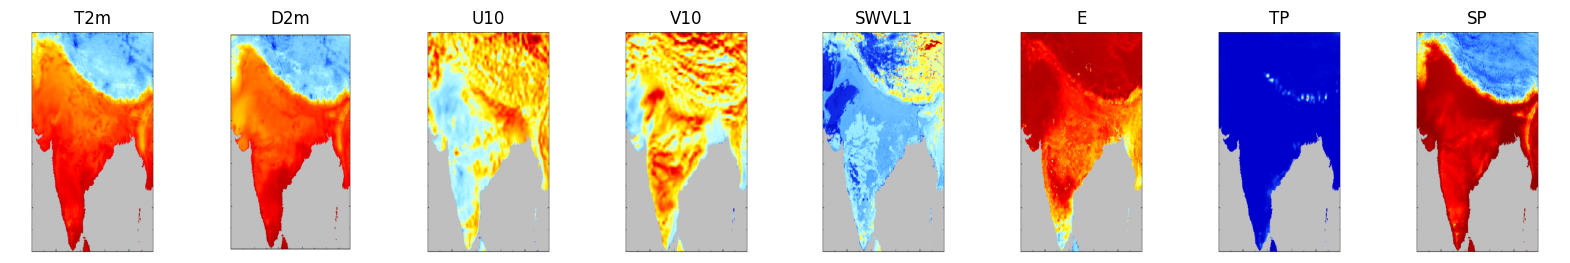

In [ ]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(1,8 , figsize=(20, 8))

# Plot each of the sequential images for one random data example.
#data_choice = np.random.choice(range(len(pred)), size=1)[0]
for idx, ax in enumerate(axes.flat):
  #print(data_choice,idx)
  ax.imshow(np.squeeze(train_images_series_n[0][idx]), cmap="gray")
  ax.set_title(labels[idx])
  ax.axis("off")

# Print information and display the figure.
plt.show()

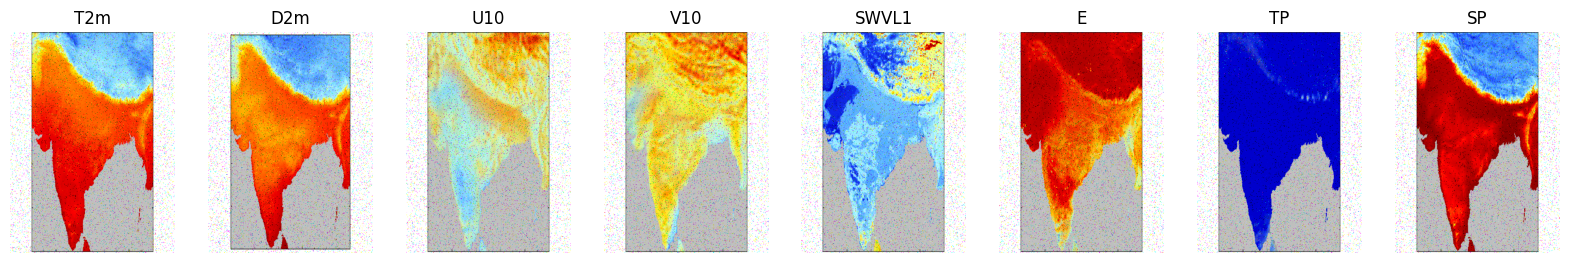

In [ ]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(1,8 , figsize=(20, 8))

# Plot each of the sequential images for one random data example.
#data_choice = np.random.choice(range(len(pred)), size=1)[0]
for idx, ax in enumerate(axes.flat):
  #print(data_choice,idx)
  ax.imshow(np.squeeze(pred[idx]), cmap="gray")
  ax.set_title(labels[idx])
  ax.axis("off")

# Print information and display the figure.
plt.show()

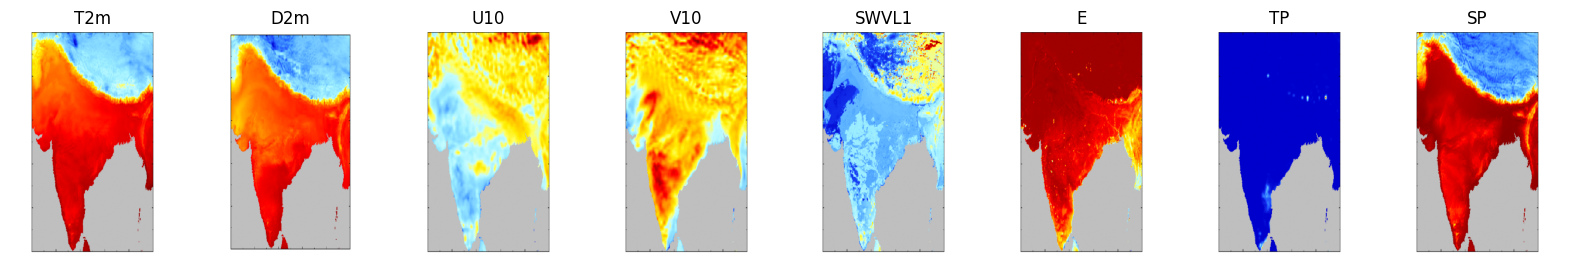

In [ ]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(1,8 , figsize=(20, 8))

# Plot each of the sequential images for one random data example.
#data_choice = np.random.choice(range(len(pred)), size=1)[0]
for idx, ax in enumerate(axes.flat):
  #print(data_choice,idx)
  ax.imshow(np.squeeze(test_images_series_n[0][idx]), cmap="gray")
  ax.set_title(labels[idx])
  ax.axis("off")

# Print information and display the figure.
plt.show()